OpenClassrooms
Project 4, Data Scientist
Author : Oumeima EL GHARBI
Date : August,September 2022

# Feature Engineering to predict CO2

### Introduction

#### Importing libraries

In [5]:
%reset -f

import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [6]:
# Heure démarrage
t0 = time()

# seed pour les générateurs aléatoires
seed = 1
print("Seed value: ", seed)

Seed value:  1


In [7]:
all_energy_dir = ["steam", "electricity", "gas", "total_energy"]
#all_energy_dir = ["electricity", "steam", "gas", "steam_gas"]
#all_energy_names = ["Ratio_Electricity","Ratio_Steam", "Ratio_Gas",  "Ratio_Steam+Gas"]

all_energy_names = ["Log-SteamUse(kBtu)", "Log-Electricity(kBtu)", "Log-NaturalGas(kBtu)", "Log-TotalEnergy(kBtu)"]

experiment_dir = "./Experiment_1_log/"
path_energy = "dataset/energy/"

#### Loading dataset

In [8]:
train_energy_file = path_energy + "train_energy.csv"
test_energy_file =  path_energy + "test_energy.csv"

train_energy = pd.read_csv(train_energy_file, sep=",")
test_energy = pd.read_csv(test_energy_file, sep=",")

dataset = pd.concat([train_energy, test_energy], ignore_index=True) # reindexation

In [9]:
dataset_energy = dataset.iloc[:, :-6]

In [10]:
dataset_energy.shape

(3147, 50)

In [11]:
dataset_energy.columns

Index(['Neighborhood_Ballard', 'Neighborhood_Central', 'Neighborhood_Delridge',
       'Neighborhood_Downtown', 'Neighborhood_East',
       'Neighborhood_Greater duwamish', 'Neighborhood_Lake union',
       'Neighborhood_Magnolia / queen anne', 'Neighborhood_North',
       'Neighborhood_Northeast', 'Neighborhood_Northwest',
       'Neighborhood_Southeast', 'Neighborhood_Southwest',
       'BuildingType_Campus', 'BuildingType_Multifamily hr (10+)',
       'BuildingType_Multifamily lr (1-4)',
       'BuildingType_Multifamily mr (5-9)', 'BuildingType_Nonresidential',
       'BuildingType_Nonresidential cos', 'BuildingType_Sps-district k-12',
       'PrimaryPropertyType_Distribution center',
       'PrimaryPropertyType_High-rise multifamily',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 school', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large office',
       'PrimaryPropertyType_Low-rise multifamily',
       'Prima

In [12]:
dataset

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Log-TotalEnergy(kBtu),Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.733123,-0.923528,-0.439239,1927,15.793246,14.510597,15.188220,14.059596,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.670863,1.072892,2.153810,1996,15.942305,0.000000,14.991964,15.453552,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.260821,-0.923528,-0.439239,1969,18.100297,16.886654,17.718022,14.216834,43.0,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.738385,-0.923528,-0.439239,1999,16.307609,0.000000,15.813123,15.366298,NaN,5.713106
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.909942,-0.923528,-0.439239,1926,15.655764,14.638056,15.106575,12.861492,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.393305,1.527976,-0.439239,2015,15.696876,0.000000,14.946797,15.057593,100.0,5.330397
3143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.590684,0.944811,1.780089,2015,14.586193,0.000000,14.586193,0.000000,84.0,2.776954
3144,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.367249,1.478762,3.044854,2015,17.488365,0.000000,16.978316,16.570909,NaN,6.908815
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.490359,1.298680,-0.439239,2015,15.083074,0.000000,14.503028,14.262382,100.0,4.583947


### 1) Predict each energy

In [13]:

def predict_energies(df_energy, list_energy_dir):
    """

    """
    for index, energy_dir in enumerate(list_energy_dir):

        # we load each best model for each energy features
        filename = 'model/{}/best_model_{}.sav'.format(energy_dir, energy_dir)
        best_model_energy = pickle.load(open(filename, 'rb'))

        y_pred_energy = best_model_energy.predict(df_energy)
        series_y_pred = pd.Series(y_pred_energy)
        # we put into one Series the prediction of the train set and test set
        df_pred = pd.DataFrame(series_y_pred, columns=[all_energy_names[index]])

        print("Step :", index, energy_dir)
        #display(df_pred) # OK

        if index == 0:
            df_energy_after = pd.DataFrame({})
        df_energy_after = pd.concat([df_energy_after, df_pred], axis=1)

    display(df_energy_after)
    return df_energy_after

dataset_predicted_energies = predict_energies(dataset_energy, all_energy_dir)

Step : 0 steam
Step : 1 electricity
Step : 2 gas
Step : 3 total_energy


,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu)
0,13.433270,15.101191,13.840356,15.895193
1,0.820941,15.090989,13.924869,15.710253
2,13.953497,17.477129,14.844642,18.056078
3,0.603927,15.555330,11.665644,16.020353
4,11.798197,15.732164,10.142128,15.950182
...,...,...,...,...
3142,0.100415,14.958304,11.901426,15.324675
3143,0.000000,14.420412,10.942769,14.759732
3144,0.231586,16.336266,14.065565,17.094656
3145,0.000000,14.983027,13.481304,15.337204


In [14]:
#dataset["Log-TotalGHGEmissions"].index.unique()

In [15]:
#dataset_predicted_energies.index

In [16]:
dataset_CO2 = pd.concat([dataset_predicted_energies, dataset["Log-TotalGHGEmissions"], dataset["ENERGYSTARScore"]], axis=1)

display(dataset_CO2)

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions,ENERGYSTARScore
0,13.433270,15.101191,13.840356,15.895193,5.525373,60.0
1,0.820941,15.090989,13.924869,15.710253,5.693261,61.0
2,13.953497,17.477129,14.844642,18.056078,7.645053,43.0
3,0.603927,15.555330,11.665644,16.020353,5.713106,NaN
4,11.798197,15.732164,10.142128,15.950182,5.404972,NaN
...,...,...,...,...,...,...
3142,0.100415,14.958304,11.901426,15.324675,5.330397,100.0
3143,0.000000,14.420412,10.942769,14.759732,2.776954,84.0
3144,0.231586,16.336266,14.065565,17.094656,6.908815,NaN
3145,0.000000,14.983027,13.481304,15.337204,4.583947,100.0


### 2) Preparing dataset CO2 without ENERGYSTARScore

#### 1) Selection of features

In [17]:
# liste des variables et étiquettes
model_CO2_target = ['Log-TotalGHGEmissions']
model_CO2_features = dataset_CO2.columns.tolist()[:-2]
#model_CO2_features = ['Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Log-TotalEnergy(kBtu)']
model_CO2 = model_CO2_features + model_CO2_target

model_CO2

['Log-SteamUse(kBtu)',
 'Log-Electricity(kBtu)',
 'Log-NaturalGas(kBtu)',
 'Log-TotalEnergy(kBtu)',
 'Log-TotalGHGEmissions']

#### 2) Separation train and test dataset


In [18]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset_CO2, test_size=0.3,  random_state=seed)

train_common

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions,ENERGYSTARScore
1008,0.000000,13.448071,4.381390,13.547426,1.865629,60.0
1784,0.000000,12.415562,11.690739,13.378095,3.089223,90.0
1563,0.000000,14.563994,1.622976,14.555510,2.585506,98.0
452,0.512560,13.693683,9.180675,13.874565,3.421653,NaN
1561,0.000000,13.617261,1.517397,13.492342,1.536867,82.0
...,...,...,...,...,...,...
2763,0.081262,13.789087,9.567516,14.113312,3.639689,47.0
905,0.000000,13.567349,7.850429,13.880654,1.291984,53.0
1096,0.000000,13.076702,12.619469,14.301472,3.507058,63.0
235,0.000000,14.675672,11.805671,15.172963,4.321613,NaN


In [19]:
# Selection des variables pour modélisation CO2
train_CO2, test_CO2 = train_common[model_CO2], test_common[model_CO2]

In [20]:
train_CO2

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,0.000000,13.448071,4.381390,13.547426,1.865629
1784,0.000000,12.415562,11.690739,13.378095,3.089223
1563,0.000000,14.563994,1.622976,14.555510,2.585506
452,0.512560,13.693683,9.180675,13.874565,3.421653
1561,0.000000,13.617261,1.517397,13.492342,1.536867
...,...,...,...,...,...
2763,0.081262,13.789087,9.567516,14.113312,3.639689
905,0.000000,13.567349,7.850429,13.880654,1.291984
1096,0.000000,13.076702,12.619469,14.301472,3.507058
235,0.000000,14.675672,11.805671,15.172963,4.321613


#### 3) Standardization of numerical variables

In [21]:
train_CO2[model_CO2_features]

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu)
1008,0.000000,13.448071,4.381390,13.547426
1784,0.000000,12.415562,11.690739,13.378095
1563,0.000000,14.563994,1.622976,14.555510
452,0.512560,13.693683,9.180675,13.874565
1561,0.000000,13.617261,1.517397,13.492342
...,...,...,...,...
2763,0.081262,13.789087,9.567516,14.113312
905,0.000000,13.567349,7.850429,13.880654
1096,0.000000,13.076702,12.619469,14.301472
235,0.000000,14.675672,11.805671,15.172963


In [22]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_CO2 = StandardScaler().fit(train_CO2[model_CO2_features])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[model_CO2_features] = std_scaler_CO2.transform(train_CO2[model_CO2_features])
test_CO2_std[model_CO2_features] = std_scaler_CO2.transform(test_CO2[model_CO2_features])

In [23]:
print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,0.000000,13.448071,4.381390,13.547426,1.865629
1784,0.000000,12.415562,11.690739,13.378095,3.089223
1563,0.000000,14.563994,1.622976,14.555510,2.585506
452,0.512560,13.693683,9.180675,13.874565,3.421653
1561,0.000000,13.617261,1.517397,13.492342,1.536867
...,...,...,...,...,...
2763,0.081262,13.789087,9.567516,14.113312,3.639689
905,0.000000,13.567349,7.850429,13.880654,1.291984
1096,0.000000,13.076702,12.619469,14.301472,3.507058
235,0.000000,14.675672,11.805671,15.172963,4.321613


After


,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,-0.272743,-0.648469,-1.068137,-0.999833,1.865629
1784,-0.272743,-1.573642,0.828958,-1.161182,3.089223
1563,-0.272743,0.351445,-1.784066,-0.039272,2.585506
452,-0.018022,-0.428391,0.177487,-0.688116,3.421653
1561,-0.272743,-0.496868,-1.811469,-1.052320,1.536867
...,...,...,...,...,...
2763,-0.232359,-0.342904,0.277889,-0.460624,3.639689
905,-0.272743,-0.541591,-0.167770,-0.682313,1.291984
1096,-0.272743,-0.981232,1.070004,-0.281334,3.507058
235,-0.272743,0.451513,0.858788,0.549074,4.321613


#### 4) Distribution of variables

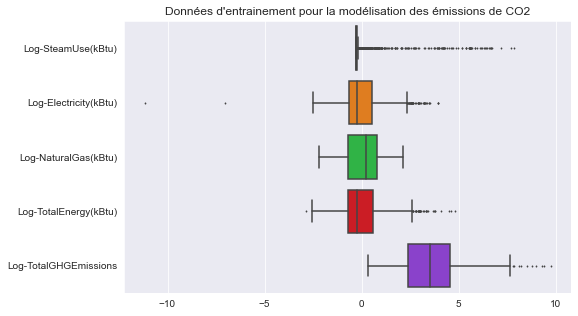

In [24]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 5) Saving dataset

In [25]:
path_save_CO2 = "dataset/CO2/"

# Sauvegarde des jeux de données
train_CO2_std.to_csv("{}{}".format(path_save_CO2, "train_CO2.csv"), encoding='utf-8', index=False)
test_CO2_std.to_csv("{}{}".format(path_save_CO2, "test_CO2.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_CO2, 'scaler_features': model_CO2_features}
filename = 'model/scaler_CO2.sav'
pickle.dump(model, open(filename, 'wb'))

### 3) Preparing dataset CO2 with ENERGYSTARScore

#### 1) Selection of features

In [26]:
# Liste des variables et étiquettes pour la modélisation
model_EnergyStarScore_target = ['Log-TotalGHGEmissions']
model_EnergyStarScore_features = model_CO2_features + ['ENERGYSTARScore']
model_EnergyStarScore = model_EnergyStarScore_features + model_EnergyStarScore_target

model_EnergyStarScore

['Log-SteamUse(kBtu)',
 'Log-Electricity(kBtu)',
 'Log-NaturalGas(kBtu)',
 'Log-TotalEnergy(kBtu)',
 'ENERGYSTARScore',
 'Log-TotalGHGEmissions']

#### 2) Separation train and test dataset


In [27]:
# we drop the buildings for which the EnergyStarScore is missing
dataset_clean = dataset_CO2.dropna(axis=0)

train_clean, test_clean = train_test_split(dataset_clean, test_size=0.3, random_state=seed)

train_clean

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions,ENERGYSTARScore
920,0.000000,15.516685,13.467231,15.942636,5.486414,89.0
2752,0.000000,12.632865,10.385438,13.320335,3.322515,52.0
478,0.000000,14.251281,1.961806,14.295299,2.540026,59.0
679,0.000000,12.819279,11.502287,13.732145,3.033028,92.0
147,1.401288,17.516304,4.691753,17.631159,5.825912,69.0
...,...,...,...,...,...,...
1296,0.000000,13.209440,0.176087,13.302039,1.499623,77.0
1219,0.000000,13.861011,8.280871,14.407993,4.120175,100.0
1483,0.027089,12.544075,11.923407,13.773218,3.884446,80.0
330,0.543223,15.024944,9.964292,15.191804,4.248781,89.0


In [28]:
# Selection des variables pour modélisation CO2
train_EnergyStarScore, test_EnergyStarScore = train_clean[model_EnergyStarScore], test_clean[model_EnergyStarScore]

In [29]:
train_EnergyStarScore

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
920,0.000000,15.516685,13.467231,15.942636,89.0,5.486414
2752,0.000000,12.632865,10.385438,13.320335,52.0,3.322515
478,0.000000,14.251281,1.961806,14.295299,59.0,2.540026
679,0.000000,12.819279,11.502287,13.732145,92.0,3.033028
147,1.401288,17.516304,4.691753,17.631159,69.0,5.825912
...,...,...,...,...,...,...
1296,0.000000,13.209440,0.176087,13.302039,77.0,1.499623
1219,0.000000,13.861011,8.280871,14.407993,100.0,4.120175
1483,0.027089,12.544075,11.923407,13.773218,80.0,3.884446
330,0.543223,15.024944,9.964292,15.191804,89.0,4.248781


#### 3) Standardization of numerical variables

In [30]:
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_EnergyStarScore_std, test_EnergyStarScore_std = train_EnergyStarScore.copy(), test_EnergyStarScore.copy()

std_scaler_EnergyStarScore = StandardScaler()  # other way of writing the scaling
train_EnergyStarScore_std[model_EnergyStarScore_features] = std_scaler_EnergyStarScore.fit_transform(
    train_EnergyStarScore[model_EnergyStarScore_features])

test_EnergyStarScore_std[model_EnergyStarScore_features] = std_scaler_EnergyStarScore.transform(
    test_EnergyStarScore[model_EnergyStarScore_features])

In [31]:
train_EnergyStarScore_std

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
920,-0.263290,1.194726,1.312321,1.266266,0.804084,5.486414
2752,-0.263290,-1.468029,0.546047,-1.235245,-0.579475,3.322515
478,-0.263290,0.026324,-1.548452,-0.305191,-0.317721,2.540026
679,-0.263290,-1.295906,0.823746,-0.842404,0.916265,3.033028
147,0.383692,3.041061,-0.869663,2.877011,0.056214,5.825912
...,...,...,...,...,...,...
1296,-0.263290,-0.935653,-1.992464,-1.252698,0.355362,1.499623
1219,-0.263290,-0.334030,0.022755,-0.197687,1.215413,4.120175
1483,-0.250783,-1.550013,0.928456,-0.803223,0.467543,3.884446
330,-0.012481,0.740681,0.441330,0.550019,0.804084,4.248781


#### 4) Distribution of variables

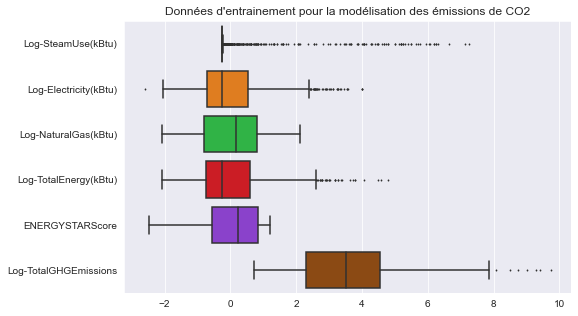

In [32]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_EnergyStarScore_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 5) Saving dataset

In [33]:
path_save_EnergyStarScore = "dataset/CO2_EnergyStarScore/"

# Sauvegarde des jeux de données
train_EnergyStarScore_std.to_csv("{}{}".format(path_save_EnergyStarScore, "train_EnergyStarScore.csv"), encoding='utf-8', index=False)
test_EnergyStarScore_std.to_csv("{}{}".format(path_save_EnergyStarScore, "test_EnergyStarScore.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_EnergyStarScore, 'scaler_features': model_EnergyStarScore_features}
filename = 'model/scaler_EnergyStarScore.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 2.682095 sec
computing time : 00:00:02
